In [1]:
import os
import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport

In [2]:
BASE_DATASET = "../../data/mlspec-blackfriday/dataset/raw"
os.makedirs(BASE_DATASET, exist_ok=True)

In [3]:
!gsutil cp -r gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/* $BASE_DATASET/

Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/README.md...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/test.csv...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/train.csv...

Operation completed over 3 objects/33.5 MiB.                                     


In [4]:
TRAIN_SET = os.path.join(BASE_DATASET, 'train.csv')
df = pd.read_csv(TRAIN_SET)

In [5]:
df = df.astype(
    {
        'User_ID': object,
        'Occupation': object,
        'Marital_Status': object,
        'Product_Category_1': object,
        'Product_Category_2': object,
        'Product_Category_3': object,
    },
    copy=False,
    errors='raise'
)

In [6]:
df.describe(include=object)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,550068,550068,550068,550068,550068,550068,550068,550068,550068,376430.0,166821.0
unique,5891,3631,2,7,21,3,5,2,20,17.0,15.0
top,1001680,P00265242,M,26-35,4,B,1,0,5,8.0,16.0
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933,64088.0,32636.0


In [7]:
df.describe(include=np.number)

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [8]:
REPORT_ROOT='../../report'
TRAIN_SET_REPORT=os.path.join(REPORT_ROOT, os.path.split(TRAIN_SET)[-1]+'.html')

In [9]:
report = ProfileReport(df)

In [10]:
os.makedirs(REPORT_ROOT, exist_ok=True)
report.to_file(output_file=TRAIN_SET_REPORT)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Product coverage

In [24]:
product_rank = df.groupby(['Product_ID']).agg(Counts=('User_ID', 'count')).reset_index()

In [25]:
product_rank.head()

,Product_ID,Counts
0,P00000142,1152
1,P00000242,376
2,P00000342,244
3,P00000442,92
4,P00000542,149


<AxesSubplot:>

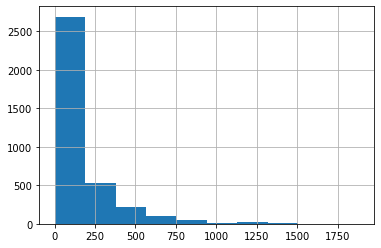

In [26]:
product_rank['Counts'].hist()

In [27]:
product_rank.describe()

,Counts
count,3631.000000
mean,151.492151
std,212.852932
min,1.000000
25%,19.500000
50%,71.000000
75%,194.000000
max,1880.000000


In [28]:
product_rank.loc[product_rank.Counts < 2]

,Product_ID,Counts
88,P00008942,1
120,P00012342,1
125,P00012942,1
129,P00013442,1
130,P00013542,1
...,...,...
3434,P00357542,1
3500,P00364342,1
3502,P00364542,1
3516,P00365942,1


## User Coverage

In [29]:
user_rank = df.groupby(['User_ID']).agg(Counts=('Product_ID', 'count')).reset_index()

<AxesSubplot:>

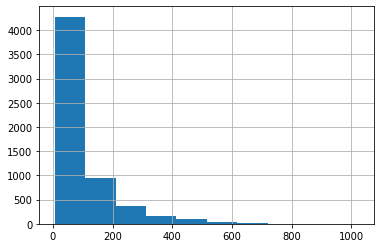

In [30]:
user_rank['Counts'].hist()

In [31]:
user_rank[['Counts']].describe()

,Counts
count,5891.000000
mean,93.374300
std,107.190049
min,6.000000
25%,26.000000
50%,54.000000
75%,117.000000
max,1026.000000


In [32]:
user_rank.loc[user_rank.Counts < 7]

,User_ID,Counts
686,1000708,6


# Product features

In [33]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [34]:
product_features = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

In [35]:
product_normality_test = df.groupby(['Product_ID']).agg(
    {col: ['min', 'max'] for col in product_features }
)

In [36]:
for col in product_features:
    differences = product_normality_test[col]['min'].compare(product_normality_test[col]['max']).size
    print('{} differences: {}'.format(col, differences) )

Product_Category_1 differences: 0
Product_Category_2 differences: 0
Product_Category_3 differences: 0


# User features

In [37]:
user_features = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

In [38]:
user_normality_test = df.groupby(['User_ID']).agg(
    {col: ['min', 'max'] for col in user_features }
)

In [39]:
for col in user_features:
    differences = user_normality_test[col]['min'].compare(user_normality_test[col]['max']).size
    print('{} differences: {}'.format(col, differences) )

Gender differences: 0
Age differences: 0
Occupation differences: 0
City_Category differences: 0
Stay_In_Current_City_Years differences: 0
Marital_Status differences: 0
